In [1]:
from jinja2 import Template
import viola
import pandas as pd
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import sklearn.metrics as sma
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.impute import SimpleImputer
from IPython.display import Image
import dataframe_image as dfi

In [2]:
#Read the file

df = pd.read_csv('C:/Users/tsdes/Desktop/plagarism report/project/Final Weather Dataset.csv')
df.style.set_properties(**{'background-color': 'black',
                            'color': 'yellow',
                            'border-color': 'yellow','font-size':'12px'})


In [3]:

#Get Columns from dataset
X= df.iloc[:,[2,3,4,5]].values


In [4]:
#Replacing missing values with median
s_imputer=SimpleImputer(missing_values=0,strategy="median")

In [5]:
s_imputer=s_imputer.fit(X)
X=s_imputer.transform(X)
X

array([[25.69, 27.38,  1.54, 13.73],
       [25.69, 26.2 ,  1.54, 13.73],
       [25.69, 26.4 ,  1.54, 13.73],
       ...,
       [26.  ,  8.  , 17.  , 10.  ],
       [20.  , 11.  , 11.  , 14.  ],
       [26.  , 10.  , 10.  ,  4.  ]])

In [6]:
y=pd.DataFrame(X)
y

0      1      2      3
0     25.69  27.38   1.54  13.73
1     25.69  26.20   1.54  13.73
2     25.69  26.40   1.54  13.73
3     25.69  25.97   1.54  13.73
4     25.69  25.18   1.54  13.73
...     ...    ...    ...    ...
2318  26.00   5.00  15.00   9.00
2319  28.00  11.00  14.00   9.00
2320  26.00   8.00  17.00  10.00
2321  20.00  11.00  11.00  14.00
2322  26.00  10.00  10.00   4.00

[2323 rows x 4 columns]

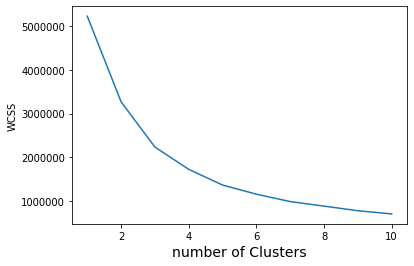

In [7]:
#find out no of clusters
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("number of Clusters",fontsize=14)
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit_predict(y)


array([0, 0, 0, ..., 0, 0, 0])

In [10]:
import pickle
pickle.dump('model',open('weather.pkl','wb'))
